# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
# load dataframe
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
#create a column that has only the day of the year
df['MM-DD'] = df['Date'].apply(lambda x: x[5:])
df.head()

,ID,Date,Element,Data_Value,MM-DD
0,USW00094889,2014-11-12,TMAX,22,11-12
1,USC00208972,2009-04-29,TMIN,56,04-29
2,USC00200032,2008-05-26,TMAX,278,05-26
3,USC00205563,2005-11-11,TMAX,139,11-11
4,USC00200230,2014-02-27,TMAX,-106,02-27


In [4]:
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date'].head()

0   2014-11-12
1   2009-04-29
2   2008-05-26
3   2005-11-11
4   2014-02-27
Name: Date, dtype: datetime64[ns]

In [5]:
# get day of the year in column
df['Day of year'] = df['Date'].dt.dayofyear
df.head()

,ID,Date,Element,Data_Value,MM-DD,Day of year
0,USW00094889,2014-11-12,TMAX,22,11-12,316
1,USC00208972,2009-04-29,TMIN,56,04-29,119
2,USC00200032,2008-05-26,TMAX,278,05-26,147
3,USC00205563,2005-11-11,TMAX,139,11-11,315
4,USC00200230,2014-02-27,TMAX,-106,02-27,58


In [6]:
# discard any 29 of february
df = df[df['MM-DD'] != '02-29']

In [21]:
# for each day of the year get the max temperature (no year 2015)
dates_list = list(range(1,366))

# create df for all years but 2015
df_no2015 = df[df['Date']<'2015-01-01']

# initialize empty df for min and max temperatures
list_no2015_max = []
list_no2015_min = []

for date in dates_list:
    list_no2015_max.append([date, df_no2015[df_no2015['Day of year']==date].max()['Data_Value']])
    list_no2015_min.append([date, df_no2015[df_no2015['Day of year']==date].min()['Data_Value']])
    
df_no2015_max = pd.DataFrame(list_no2015_max, columns=['Day of year', 'Temperature'])
df_no2015_min = pd.DataFrame(list_no2015_min, columns=['Day of year', 'Temperature'])

In [22]:
df_no2015_max.set_index('Day of year', inplace=True)
df_no2015_min.set_index('Day of year', inplace=True)
df_no2015_max.head()

,Temperature
Day of year,
1,156
2,139
3,133
4,106
5,128


In [26]:
# get min max temperature of 2015
df_2015 = df[df['Date']>='2015-01-01']

# initialize empty df for min and max temperatures
list_2015_max = []
list_2015_min = []

for date in dates_list:
    list_2015_max.append([date, df_2015[df_2015['Day of year']==date].max()['Data_Value']])
    list_2015_min.append([date, df_2015[df_2015['Day of year']==date].min()['Data_Value']])

        
df_2015_max = pd.DataFrame(list_2015_max, columns=['Day of year', 'Temperature'])
df_2015_min = pd.DataFrame(list_2015_min, columns=['Day of year', 'Temperature'])

In [27]:
df_2015_max.set_index('Day of year', inplace=True)
df_2015_min.set_index('Day of year', inplace=True)
df_2015_max.head()

,Temperature
Day of year,
1,11
2,39
3,39
4,44
5,28


In [35]:
#merge dataframes
df_all_max = pd.merge(df_no2015_max, df_2015_max, how='inner', left_index=True, right_index=True)
df_all_max.rename(columns={'Temperature_x':'Temperature 2005-2014', 'Temperature_y':'Temperature 2015'}, inplace=True)
df_all_max.reset_index(inplace=True)

df_all_min = pd.merge(df_no2015_min, df_2015_min, how='inner', left_index=True, right_index=True)
df_all_min.rename(columns={'Temperature_x':'Temperature 2005-2014', 'Temperature_y':'Temperature 2015'}, inplace=True)
df_all_min.reset_index(inplace=True)
df_all_min.head()

,Day of year,Temperature 2005-2014,Temperature 2015
0,1,-160,-133
1,2,-267,-122
2,3,-267,-67
3,4,-261,-88
4,5,-150,-155


In [45]:
# get record temperatures of 2015
recorddf_all_max = df_all_max[df_all_max['Temperature 2005-2014']<df_all_max['Temperature 2015']]
recorddf_all_min = df_all_min[df_all_min['Temperature 2005-2014']>df_all_min['Temperature 2015']]
recorddf_all_max

,Day of year,Temperature 2005-2014,Temperature 2015
39,40,78,83
106,107,272,278
126,127,261,306
127,128,317,333
130,131,294,306
137,138,289,317
207,208,333,339
209,210,339,361
249,250,317,350
258,259,306,311


In [42]:
# plot the max and min temperature
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


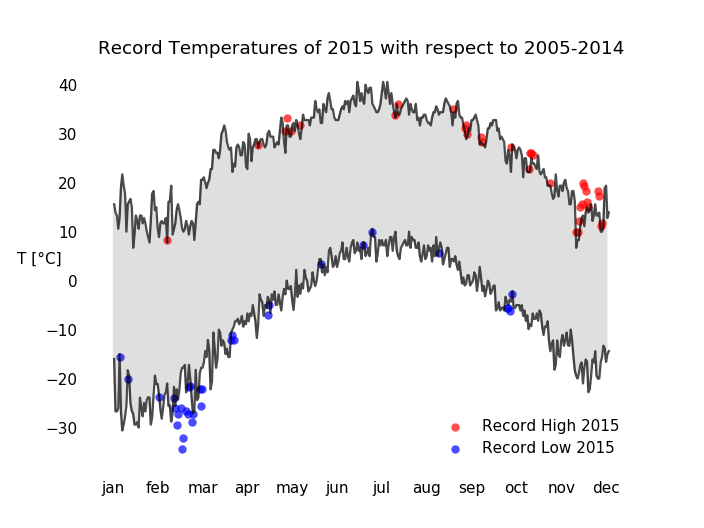

In [108]:
plt.figure()
# plot max and min temperature
plt.plot(df_no2015_max['Temperature']/10, '-', color='k', alpha=0.7, label='_nolegend_')
plt.plot(df_no2015_min['Temperature']/10, '-', color='k', alpha=0.7, label='_nolegend_')

# fill the space between
plt.gca().fill_between(range(len(df_no2015_max['Temperature'])), 
                       df_no2015_max['Temperature']/10, df_no2015_min['Temperature']/10, 
                       facecolor='grey', 
                       alpha=0.25, label='_nolegend_')

# labels and stuff
ax = plt.gca()
ax.set_xticks(list(range(0,365,int(round(365/11)))))
ax.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.tick_params(top='off', bottom='off', left='off', right='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Record Temperatures of 2015 with respect to 2005-2014')
plt.ylabel('T [°C]', rotation=0)

# add 2015
plt.scatter(recorddf_all_max['Day of year'], recorddf_all_max['Temperature 2015']/10, s=30, c='r', alpha=0.7, linewidths=0, label='Record High 2015')
plt.scatter(recorddf_all_min['Day of year'], recorddf_all_min['Temperature 2015']/10, s=30, c='b', alpha=0.7, linewidths=0, label='Record Low 2015')

# add legend
plt.legend(frameon=False)